# ネットワーク信頼性の計算

この章ではGraphillionの機能を用いて情報通信ネットワークの**故障しにくさ**を評価する手法を紹介します．

## 情報通信ネットワークと信頼性

情報通信ネットワークとは，端末間にリンクをつなぐことによって端末間の通信を可能とするネットワークのことです．通信ネットワークは端末を頂点，リンクを辺とするグラフとしてモデル化することができます．


情報通信ネットワークは人々の生活を支える重要なインフラです．そのため，故障せずに動作し続けることが求められます．**ネットワーク信頼性**とは，あるネットワークがどれだけ故障に強いかを表す尺度のことです．情報通信ネットワークのネットワーク信頼性を知ることは，より故障に強いネットワークを実現するために役立ちます．


ネットワーク信頼性の定義について説明します．ネットワーク信頼性とは，ネットワークを構成するリンクが確率的に故障するとしたときに，特定の端点間で通信ができる確率として定義されます．具体例を使って説明しましょう．

![ネットワークの例](https://github.com/nsnmsak/graphillion_tutorial/blob/master/ja/img/08/example.png?raw=1)

左のシンプルなネットワークの信頼性を考えます．いま，ネットワークの各リンクがある一日のうちに故障する確率は1%であるとします．つまり，100日のうち1日はリンクが使えなくなるとします．このネットワークを用いて通信が行える確率はリンクが利用できる確率と等しいので，99%になります．この99%という値がネットワーク信頼性となります．

次に図2のネットワークのネットワーク信頼性を求めてみましょう．各リンクの故障率は1%であるとします．一つ前の例とは異なり，今回は単一のリンク故障があったとしても端点をつなぐ別経路が存在するため，変わらず通信が可能です．このネットワークのネットワーク信頼性は通信可能なリンク故障の組合せを全て調べることで計算できます．通信可能な故障は以下の5通りになります．
![通信可能な故障の例](https://github.com/nsnmsak/graphillion_tutorial/blob/master/ja/img/08/patterns.png?raw=1)


これらの故障について，その故障パターンが発生する確率を計算し，それらを足し合わせると，通信可能な確率，つまりネットワーク信頼性を算出することができます．実際に計算してみると，このネットワークの信頼性は98.1%となります．

この例では2つの頂点間で通信可能となる確率を計算しましたが，他にもK個の頂点や，全ての頂点で通信可能である確率をネットワーク信頼性とよぶこともあります．

## Graphillionによるネットワーク信頼性の計算

ネットワーク信頼性を計算するためには指数種類ある故障パターンを調べ上げる必要があります．そのため，ネットワークの信頼性の計算も，これまで紹介してきたグラフの問題と同様，ネットワークの大きさに対して指数的に時間がかかる問題として知られています．また，この問題は一つだけよい組合せを見つけられればよい最適化問題とも異なるため，組合せ最適化のための既存ソフトウェアも利用できません．

Graphillionを用いることでネットワーク信頼性を正確に計算することができます．`GraphSet`モジュールには，グラフの各辺が確率的に選ばれたときにグラフ集合`gs` に含まれるグラフが得られる確率を計算する， `gs.probability`というメソッドが実装されていました．ネットワーク信頼性は特定の頂点がすべて接続されるグラフが得られる確率と言い換えることができます．ことです．そのため，そのようなグラフ集合を作成して，`gs.probability`を実行することで信頼性を計算することができます．



Graphilliionを用いてネットワーク信頼性を計算する例を紹介します．今回は以下のグリッドグラフ用いて，全ての頂点間で通信可能となる確率を求めます．なお，
各辺は5%で故障するとします．

In [1]:
!pip install graphillion
!git clone https://github.com/nsnmsak/graphillion_tutorial
!cp graphillion_tutorial/ja/tutorial_util.py .

     |████████████████████████████████| 1.1MB 3.5MB/s 
  Created wheel for graphillion: filename=Graphillion-1.3-cp36-cp36m-linux_x86_64.whl size=1728283 sha256=e365c5e8f51807a79d5a9a890a02c239632d37fc8759aa8787ce7d6bcc9970c1
  Stored in directory: /root/.cache/pip/wheels/f5/11/37/c871e165ed219369e237be48be2c7cf989bc034699aeee77c8
Successfully built graphillion
Cloning into 'graphillion_tutorial'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 185 (delta 105), reused 99 (delta 39), pack-reused 0
Receiving objects: 100% (185/185), 6.35 MiB | 31.55 MiB/s, done.
Resolving deltas: 100% (105/105), done.


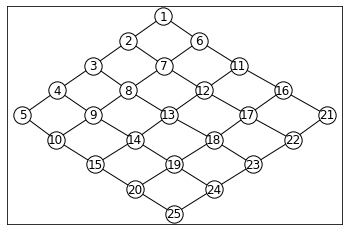

In [4]:
from graphillion import GraphSet, tutorial
from tutorial_util import draw_subgraph, draw_universe

univ = tutorial.grid(4, 4)
GraphSet.set_universe(univ)
draw_universe()

次に`GraphSet`オブジェクトを作成します．全ての頂点で通信可能である部分グラフは全域木を含む部分グラフに相当します．そのようなグラフの集合を表す`GraphSet`オブジェクトは以下のように求めることができます．

In [0]:
spanning_trees = GraphSet.trees(1, is_spanning=True)
all_subgraphs = GraphSet({})
gs = all_subgraphs.supergraphs(spanning_trees)

いくつかグラフを取り出してみると，全ての頂点が連結となっていることが分かります．

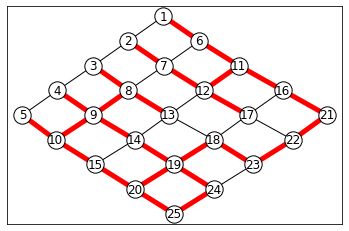

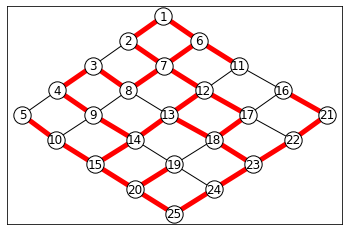

In [6]:
iterator = gs.rand_iter()
draw_subgraph(next(iterator))
draw_subgraph(next(iterator))
    

あとは故障確率を設定して，`gs.probability`メソッドを実行することで信頼性を計算できます．

In [7]:
probs = {edge: 0.95  for edge in univ}
gs.probability(probs)

0.987455319048074

`gs.probability()`メソッドの実行には`gs`に相当するZDDの頂点数に対して線形の実行時間がかかります．そのため，よほど大きなZDDを扱うのでない限り，現実的な時間で解を求めることができます．

## この章のまとめ

この章ではGraphillionを用いて情報通信ネットワークのネットワーク信頼性を計算する方法を紹介しました．ネットワークの信頼性に馴染みのある方は少ないかもしれませんが，信頼性の計算自体はグラフに関する汎用的な課題であり，かつ正確な計算が非常に困難な問題でもあります．グラフを扱う既存ソフトウェアでネットワーク信頼性を正確に計算する機能を備えているものはほぼ存在しないため，Graphillionの強みが活かされる応用事例であるといえます．
